In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle 

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!unzip ner.zip

Archive:  ner.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


In [1]:
!pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 3.8 MB 49.8 MB/s 
     |████████████████████████████████| 503 kB 47.5 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8f0b5e1f6a40b0a852ef1796f85340f5679239d62a234418acb9ebea7af97262
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [1]:
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")

In [2]:
print(f"TF version {tf.__version__}")
print(f"Numpy version {np.__version__}")

TF version 1.15.0
Numpy version 1.19.5


In [3]:
data = pd.read_csv('ner_dataset.csv', encoding="latin1")
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [4]:
data = data.drop(['POS'], axis =1)
data = data.fillna(method="ffill")

In [8]:
data

,Sentence #,Word,Tag
0,Sentence: 1,Thousands,O
1,Sentence: 1,of,O
2,Sentence: 1,demonstrators,O
3,Sentence: 1,have,O
4,Sentence: 1,marched,O
...,...,...,...
1048570,Sentence: 47959,they,O
1048571,Sentence: 47959,responded,O
1048572,Sentence: 47959,to,O
1048573,Sentence: 47959,the,O


In [5]:
words = set(list(data["Word"]))

In [ ]:
words

In [6]:
words.add('PADword')
n_words = len(words)
n_words

35179

In [7]:
tags = set(list(data["Tag"].values))
n_tags = len(tags)

In [8]:
n_tags

17

In [9]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(data)

In [ ]:
sent = getter.get_next()
print(sent)

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [11]:
sentences = getter.sentences
print(len(sentences))
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

47959
biggest sentence has 104 words


In [12]:
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
# plotted directly below the code cell that produced it. 
# The resulting plots will then also be stored in the notebook document.
%matplotlib inline

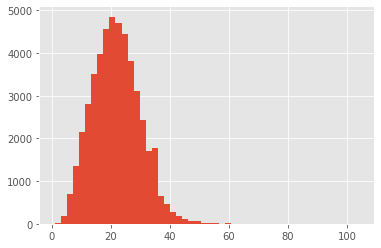

In [13]:
plt.hist([len(sen) for sen in sentences], bins=50)
plt.show()

In [14]:
# write a function that adds a padding word
max_len = 50
X = [[w[0] for w in s] for s in sentences]

In [15]:
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)


In [16]:
new_X[3]

['They',
 'left',
 'after',
 'a',
 'tense',
 'hour-long',
 'standoff',
 'with',
 'riot',
 'police',
 '.',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword']

In [17]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
tags2index = {t:i for i,t in enumerate(tags)}
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]

array([5, 8, 8, 2, 0, 0, 0, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8], dtype=int32)

In [18]:
tags2index

{'I-per': 0,
 'B-tim': 1,
 'B-per': 2,
 'B-org': 3,
 'B-geo': 4,
 'B-gpe': 5,
 'B-nat': 6,
 'I-nat': 7,
 'O': 8,
 'I-geo': 9,
 'I-gpe': 10,
 'I-art': 11,
 'B-eve': 12,
 'I-org': 13,
 'I-eve': 14,
 'B-art': 15,
 'I-tim': 16}

In [19]:
import tensorflow_hub as hub

In [20]:
sess = tf.Session()
tf.keras.backend.set_session(sess)
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [21]:
batch_size = 32
def ElmoEmbedding(x):
    return elmo_model(
        inputs={
            "tokens": tf.squeeze(tf.cast(x,    tf.string)),
            "sequence_len": tf.constant(batch_size*[max_len])
        },
        signature="tokens",
        as_dict=True)["elmo"]

In [22]:
Model = tf.keras.models.Model
Input = tf.keras.layers.Input
Add = tf.keras.layers.Add
LSTM = tf.keras.layers.LSTM
Embedding = tf.keras.layers.Embedding
Dense = tf.keras.layers.Dense
TimeDistributed = tf.keras.layers.TimeDistributed
Dropout = tf.keras.layers.Dropout
Bidirectional = tf.keras.layers.Bidirectional
Lambda = tf.keras.layers.Lambda

In [23]:
input_text = Input(shape=(max_len, ), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
x = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(embedding)
x_rnn = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [24]:
x = Add()([x, x_rnn])
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)
model = Model(inputs=input_text, outputs=out)

In [25]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [26]:
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2018)

In [27]:
X_tr, X_val = X_tr[:1213*batch_size], X_tr[-135*batch_size:]
y_tr, y_val = y_tr[:1213*batch_size], y_tr[-135*batch_size:]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (32, None, 1024)     0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (32, None, 1024)     6295552     lambda[0][0]                     
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (32, None, 1024)     6295552     bidirectional[0][0]              
______________________________________________________________________________________________

In [30]:
history = model.fit(
    np.array(X_tr), y_tr, 
    validation_data=(np.array(X_val), y_val),
    batch_size=batch_size, 
    epochs=3, 
    verbose=1,
)

Train on 38816 samples, validate on 4320 samples
Epoch 1/3
38816/38816 [==============================] - 594s 15ms/sample - loss: 0.0614 - acc: 0.9820 - val_loss: 0.0458 - val_acc: 0.9857
Epoch 2/3
38816/38816 [==============================] - 590s 15ms/sample - loss: 0.0404 - acc: 0.9870 - val_loss: 0.0418 - val_acc: 0.9867
Epoch 3/3
38816/38816 [==============================] - 591s 15ms/sample - loss: 0.0337 - acc: 0.9887 - val_loss: 0.0414 - val_acc: 0.9868


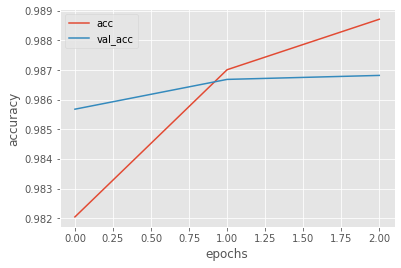

In [31]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["acc", "val_acc"])
plt.show()

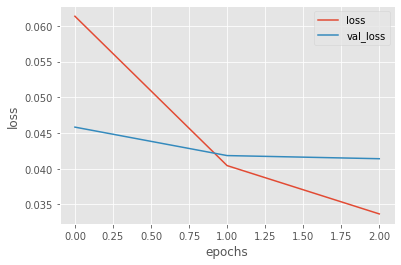

In [32]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()

In [34]:
test_data = np.array([["Apple is an organization"]])


In [53]:
def process_input(data):
    new_data = []
    for s in data:
        new_sent = []
        sent = s.split() # TODO: Change this to tokenized sequence
        for i in range(max_len):
            try:
                new_sent.append(sent[i])
            except:
                new_sent.append("PADword")
        new_data.append(new_sent)
    return np.array(new_data)

In [54]:
process_input(test_data).shape

(1, 50)

In [64]:
model.predict([X_val])

array([[[9.86612122e-07, 1.32254650e-06, 1.00252228e-05, ...,
         1.56387529e-07, 4.51906402e-07, 2.93779152e-07],
        [5.73364203e-04, 1.34196680e-03, 2.93720722e-01, ...,
         7.01801036e-06, 4.30796490e-06, 1.44681966e-04],
        [7.75552180e-04, 7.31733162e-05, 2.22189905e-04, ...,
         1.03827017e-06, 5.46407250e-07, 3.16049627e-05],
        ...,
        [1.60326117e-08, 1.19040671e-08, 1.50302810e-08, ...,
         4.45796511e-10, 1.64946918e-08, 5.88712967e-10],
        [2.27918040e-08, 1.79269275e-08, 2.33728716e-08, ...,
         7.16017856e-10, 3.37773258e-08, 7.76603226e-10],
        [5.27811856e-08, 5.98923648e-08, 4.62998635e-08, ...,
         1.67518754e-09, 9.30429067e-08, 2.23568342e-09]],

       [[8.09391713e-05, 2.21447961e-04, 6.37858000e-04, ...,
         4.42635564e-06, 1.78481678e-05, 5.20158610e-05],
        [1.37705274e-06, 2.88799602e-05, 1.36740539e-06, ...,
         2.34875259e-07, 9.14195311e-07, 9.91008073e-06],
        [4.74288449e-08, 

In [65]:
X_te = X_te[:149*batch_size]

In [68]:
X_te = np.array(X_te)

In [69]:
X_te.shape

(4768, 50)

In [70]:
test_pred = model.predict(X_te, verbose=1)

4768/4768 [==============================] - 43s 9ms/sample


In [71]:
idx2tag = {i:tag for tag, i in tags2index.items()}

In [72]:
idx2tag

{0: 'I-per',
 1: 'B-tim',
 2: 'B-per',
 3: 'B-org',
 4: 'B-geo',
 5: 'B-gpe',
 6: 'B-nat',
 7: 'I-nat',
 8: 'O',
 9: 'I-geo',
 10: 'I-gpe',
 11: 'I-art',
 12: 'B-eve',
 13: 'I-org',
 14: 'I-eve',
 15: 'B-art',
 16: 'I-tim'}

In [74]:
test_pred.shape

(4768, 50, 17)

In [ ]:
def pred2label(preds):
    
    pass

In [75]:
model.save("ner.h5")

In [87]:
np.argmax(test_pred[0])

450

In [93]:
out = []
for pred in test_pred:
    out_i = []
    for p in pred:
        p_i = np.argmax(p)
        out_i.append(idx2tag[p_i].replace("PADword", "O"))
        
    out.append(out_i)

In [95]:
print(f"Input {X_te[0]}")
print(f"Labels {out[0]}")

Input ['They' 'say' 'the' 'documents' 'were' 'found' 'in' 'the' 'computer' 'of'
 'FARC' 'leader' 'Raul' 'Reyes' 'during' 'a' 'cross-border' 'raid' 'in'
 'Ecuador' 'last' 'month' '.' 'PADword' 'PADword' 'PADword' 'PADword'
 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword'
 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword'
 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword' 'PADword'
 'PADword' 'PADword']
Labels ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'O', 'B-per', 'I-per', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
